<a href="https://colab.research.google.com/github/DanishFaraaz/Deep-Learning-Projects/blob/main/29_Keras_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

def preprocess(array):
  array = array.astype('float32') / 255.0
  array = np.reshape(array,  (len(array), 28, 28, 1))
  return array

# Function to add random noise to each image in the array
def noise(array):
  noise_factor = 0.4
  noise_array = array + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=array.shape)
  return np.clip(noise_array, 0.0, 1.0)

def display(array1, array2):
  n = 10
  indices = np.random.randint(len(array1), size=n)
  images1 = array1[indices, :]
  images2 = array2[indices, :]

  plt.figure(figsize=(20,4))
  for i, (image1, image2) in enumerate(zip(images1, images2)):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(image1.reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(image2.reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  plt.show()

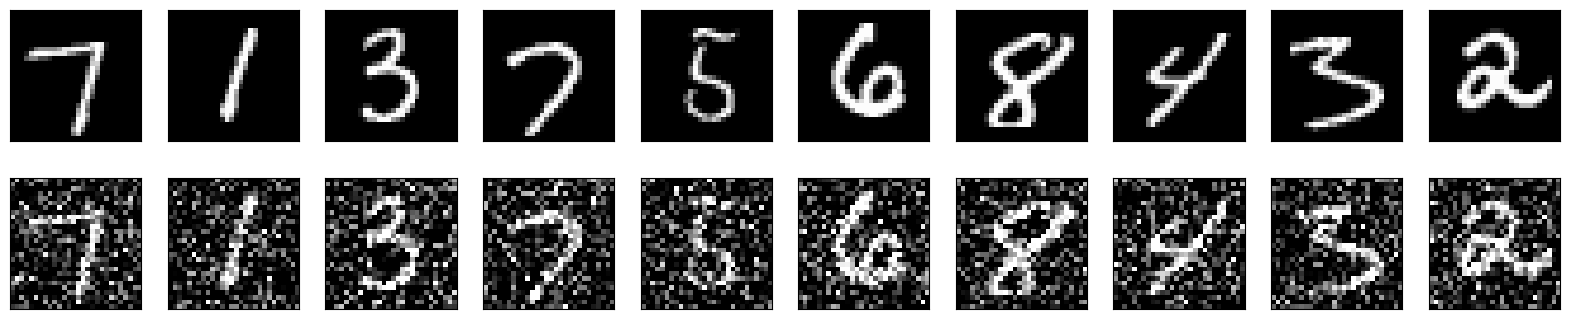

In [3]:
(train_data, _), (test_data, _) = mnist.load_data()

train_data = preprocess(train_data)
test_data = preprocess(test_data)

noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

display(train_data, noisy_train_data)

**Creating the autoencoder model**

In [4]:
from IPython.core.error import InputRejected
input = layers.Input(shape=(28,28,1))

# The encoder model
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2), padding='same')(x)

# The decoder model
x = layers.Conv2DTranspose(32, (3,3), strides=2, activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, (3,3), strides=2, activation='relu', padding='same')(x)
x = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input, x)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)        9248  

**Train the autoencoder**

In [5]:
autoencoder.fit(
    x = train_data,
    y = train_data,
    epochs = 50,
    batch_size = 128,
    shuffle = True,
    validation_data = (test_data, test_data)
)

Epoch 1/50
469/469 [==============================] - 16s 9ms/step - loss: 0.1278 - val_loss: 0.0737
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0719 - val_loss: 0.0697
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0694 - val_loss: 0.0682
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0681 - val_loss: 0.0672
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0673 - val_loss: 0.0665
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0667 - val_loss: 0.0660
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0663 - val_loss: 0.0656
Epoch 8/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0659 - val_loss: 0.0654
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0656 - val_loss: 0.0651
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0654 - val_loss: 0.064

313/313 [==============================] - 1s 2ms/step


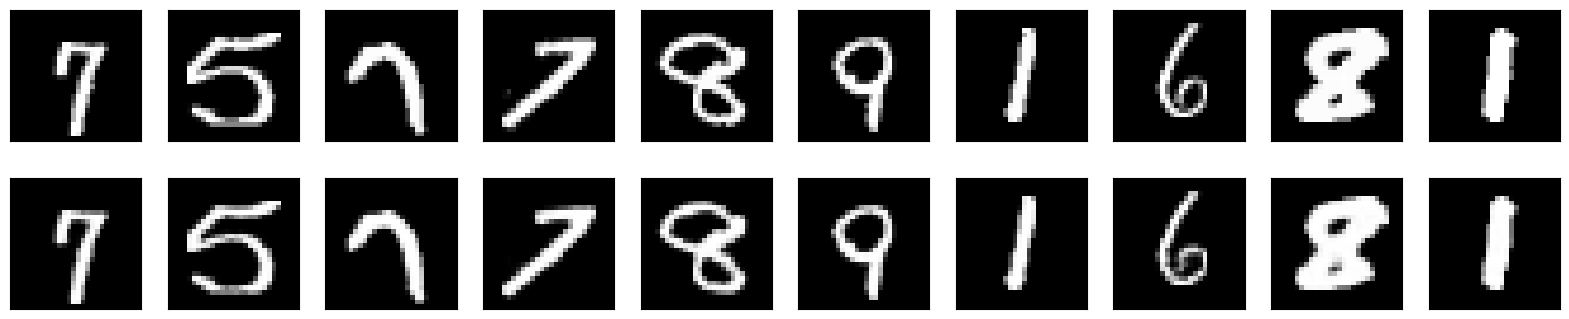

In [6]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

**Using the autoencoder as a denoiser**

In [7]:
autoencoder.fit(
    x = noisy_train_data,
    y = train_data,
    epochs = 50,
    batch_size = 128,
    shuffle = True,
    validation_data = (noisy_test_data, test_data)
)

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1018 - val_loss: 0.0940
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0936 - val_loss: 0.0917
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0918 - val_loss: 0.0904
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0907 - val_loss: 0.0897
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0900 - val_loss: 0.0891
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0893 - val_loss: 0.0884
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0889 - val_loss: 0.0881
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0885 - val_loss: 0.0879
Epoch 9/50
469/469 [==============================] - 4s 7ms/step - loss: 0.0882 - val_loss: 0.0874
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0879 - val_loss: 0.0872

313/313 [==============================] - 1s 3ms/step


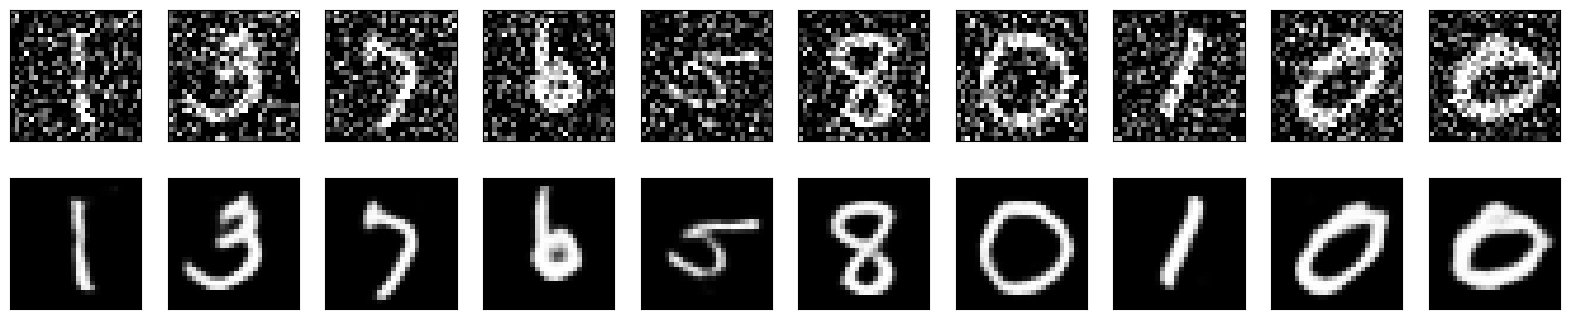

In [8]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)